In [42]:
import requests

In [43]:
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
response = requests.get(url)
print(f"Status code = {response.status_code}")

Status code = 200


In [44]:
# convert json to dictionary
response_dict = response.json()
print(response_dict.keys())

dict_keys(['total_count', 'incomplete_results', 'items'])


In [45]:
# getting general information from response
print(f"Total Repos = {response_dict['total_count']}")

repo_dicts = response_dict['items']
print(f"Repos found : {len(repo_dicts)}")

# examine the first repository:
repo_dict = repo_dicts[4]
print(f"{len(repo_dict.keys())} Keys in the first repo...")
for k in sorted(repo_dict.keys()):
    print(k)

Total Repos = 8577750
Repos found : 30
78 Keys in the first repo...
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
updated_at
url
visibility
watchers
watchers_count


In [46]:
print(f"Owner of the repo is : {repo_dict['owner']['login']}") # user login name of the owner of the repository

Owner of the repo is : pallets


In [47]:
import networkx as nx

user = repo_dict["owner"]

g_followers = nx.Graph()
g_followers.add_node(user['login'] + '(user)', type='user')

In [48]:
# followers = [ s for s in user["followers_url"] ]
followers_url = user["followers_url"]
followers = requests.get(followers_url)
followers = followers.json()

In [49]:
print(f"Number of followers : {len(followers)}")
print(type(followers))

Number of followers : 30
<class 'list'>


In [50]:
for follower in followers:
    g_followers.add_node(follower["login"] + '(user)', type='user')
    g_followers.add_edge(follower['login'] + '(user)', user['login'] + '(repo)', type='follows')

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

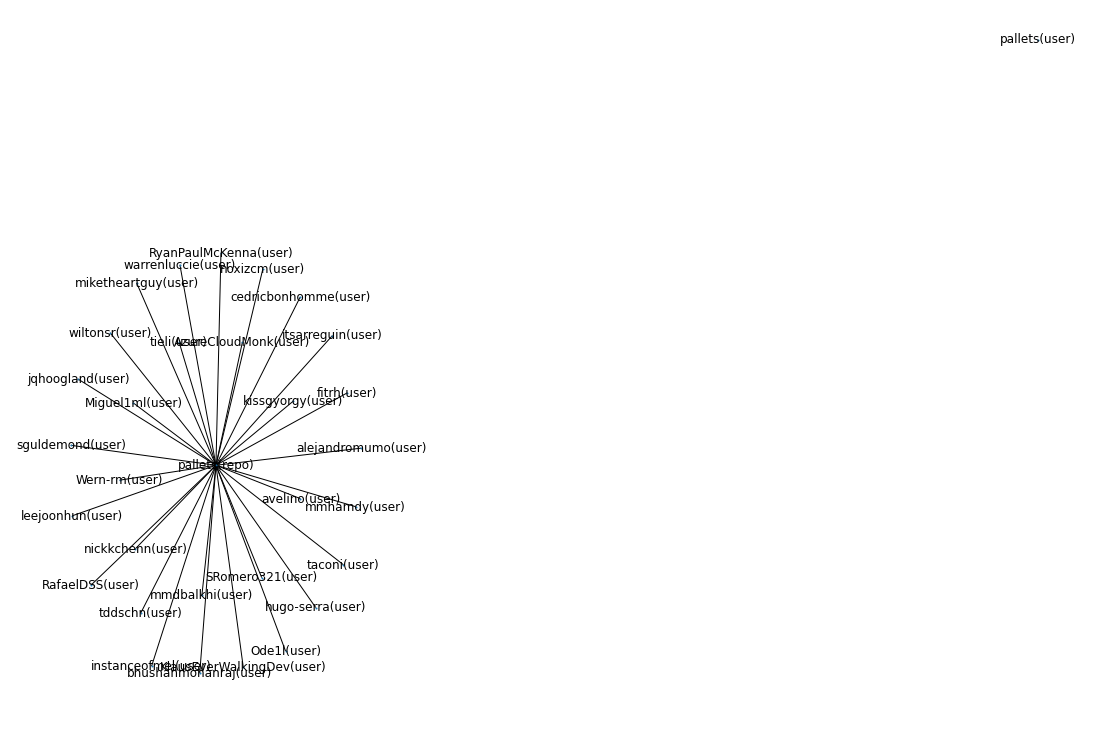

In [52]:
plt.figure(figsize=(15,10))
nx.draw(g_followers, with_labels=True, node_size=1)
plt.show()

In [54]:
for follower in followers:
    followers_url = follower["followers_url"]
    followers2 = requests.get(followers_url)
    followers2 = followers2.json()
    
    for follower2 in followers2:
        g_followers.add_node(follower2['login'] + '(user)', type='user')
        g_followers.add_edge(follower2['login'] + '(user)', user['login'] + '(repo)', type='follows')

TypeError: string indices must be integers

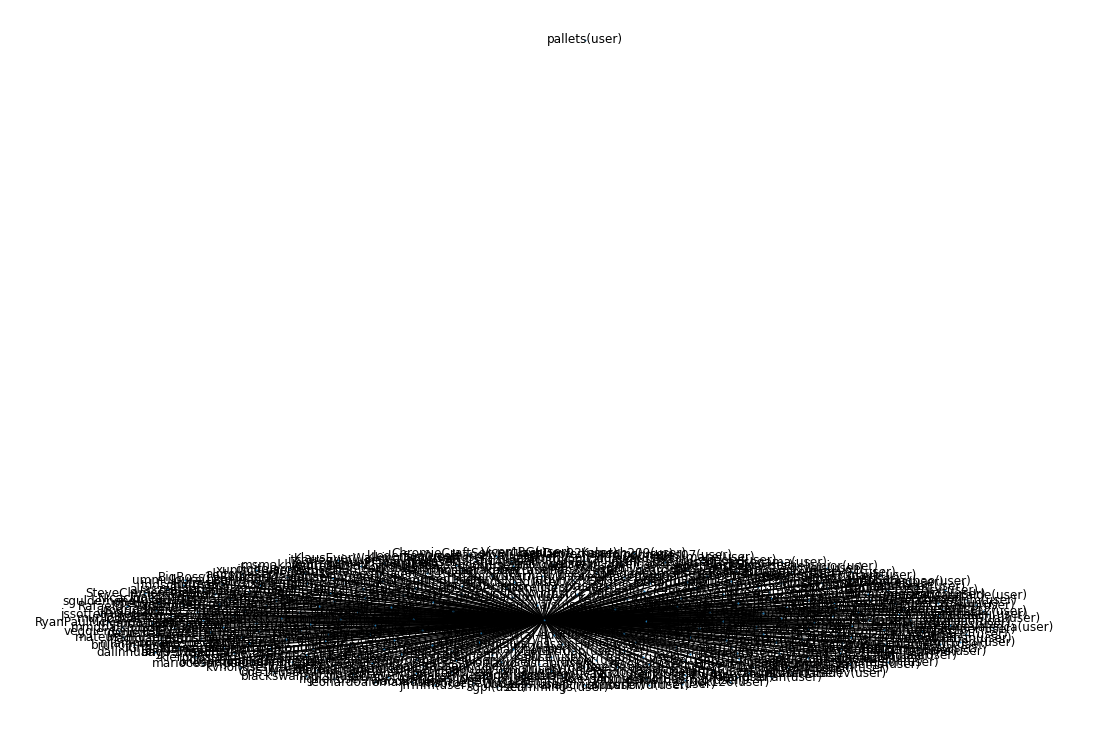

In [55]:
plt.figure(figsize=(15,10))
nx.draw(g_followers, with_labels=True, node_size=1)
plt.show()

In [56]:
print (nx.info(g_followers))

Graph with 352 nodes and 350 edges


# Data Analysis

In [57]:
# Centrality
from operator import itemgetter
from IPython.display import HTML
from IPython.core.display import display

print ("Degree Centrality")
print (sorted(nx.degree_centrality(g_followers).items(),key=itemgetter(1), reverse=True)[:10])

print ("Betweenness Centrality")
print (sorted(nx.betweenness_centrality(g_followers).items(), key=itemgetter(1), reverse=True)[:10])

print ("Closeness Centrality")
print (sorted(nx.closeness_centrality(g_followers).items(), key=itemgetter(1), reverse=True)[:10])

Degree Centrality
[('pallets(repo)', 0.9971509971509972), ('avelino(user)', 0.002849002849002849), ('kissgyorgy(user)', 0.002849002849002849), ('cedricbonhomme(user)', 0.002849002849002849), ('hugo-serra(user)', 0.002849002849002849), ('KlausEverWalkingDev(user)', 0.002849002849002849), ('miketheartguy(user)', 0.002849002849002849), ('wiltonsr(user)', 0.002849002849002849), ('tieli(user)', 0.002849002849002849), ('nickkchenn(user)', 0.002849002849002849)]
Betweenness Centrality
[('pallets(repo)', 0.9943019943019943), ('pallets(user)', 0.0), ('avelino(user)', 0.0), ('kissgyorgy(user)', 0.0), ('cedricbonhomme(user)', 0.0), ('hugo-serra(user)', 0.0), ('KlausEverWalkingDev(user)', 0.0), ('miketheartguy(user)', 0.0), ('wiltonsr(user)', 0.0), ('tieli(user)', 0.0)]
Closeness Centrality
[('pallets(repo)', 0.9971509971509972), ('avelino(user)', 0.4992887682444192), ('kissgyorgy(user)', 0.4992887682444192), ('cedricbonhomme(user)', 0.4992887682444192), ('hugo-serra(user)', 0.4992887682444192), (

In [58]:
# PageRank
pr = nx.pagerank(g_followers)
sorted_x = sorted(pr.items(), key=itemgetter(1),reverse=True)
print(sorted_x[:10])

[('pallets(repo)', 0.45942396209792774), ('avelino(user)', 0.0015432824857859939), ('kissgyorgy(user)', 0.0015432824857859939), ('cedricbonhomme(user)', 0.0015432824857859939), ('hugo-serra(user)', 0.0015432824857859939), ('KlausEverWalkingDev(user)', 0.0015432824857859939), ('miketheartguy(user)', 0.0015432824857859939), ('wiltonsr(user)', 0.0015432824857859939), ('tieli(user)', 0.0015432824857859939), ('nickkchenn(user)', 0.0015432824857859939)]


In [59]:
# HITS Algorithm 
hub, authority = nx.hits(g_followers)
sorted_hub = sorted(hub.items(), key=itemgetter(1),reverse=True)
print("Most Influential Users based on Hub Score")
print(sorted_hub[:10])
print()
sorted_authority = sorted(authority.items(), key=itemgetter(1),reverse=True)
print("Most Influential Users based on Authority Score")
print(sorted_authority[:10])

Most Influential Users based on Hub Score
[('pallets(repo)', 0.2799081453487568), ('avelino(user)', 0.0020574052990035524), ('kissgyorgy(user)', 0.0020574052990035524), ('cedricbonhomme(user)', 0.0020574052990035524), ('hugo-serra(user)', 0.0020574052990035524), ('KlausEverWalkingDev(user)', 0.0020574052990035524), ('miketheartguy(user)', 0.0020574052990035524), ('wiltonsr(user)', 0.0020574052990035524), ('tieli(user)', 0.0020574052990035524), ('nickkchenn(user)', 0.0020574052990035524)]

Most Influential Users based on Authority Score
[('pallets(repo)', 0.0072966548370078325), ('avelino(user)', 0.002836295271894264), ('kissgyorgy(user)', 0.002836295271894264), ('cedricbonhomme(user)', 0.002836295271894264), ('hugo-serra(user)', 0.002836295271894264), ('KlausEverWalkingDev(user)', 0.002836295271894264), ('miketheartguy(user)', 0.002836295271894264), ('wiltonsr(user)', 0.002836295271894264), ('tieli(user)', 0.002836295271894264), ('nickkchenn(user)', 0.002836295271894264)]
